In [36]:
# Iris Flower Classification
# Description: Classify Iris flower species using ML models (Setosa, Versicolor, Virginica)

# Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import joblib

# Visualization setup
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


In [4]:
# Load Iris dataset (download it first from Kaggle and put in the same folder)

data_path = "Iris.csv"   # or "iris.csv" depending on filename
if not os.path.exists(data_path):
    raise FileNotFoundError(f"Dataset not found at {data_path}. Please check the filename.")

df = pd.read_csv(data_path)
print("✅ Dataset loaded successfully!")
df.head()


✅ Dataset loaded successfully!


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Display basic info and structure of the dataset
print("Shape of dataset:", df.shape)
print("\nDataset info:\n")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

# Check class distribution
print("\nClass distribution:")
print(df['Species'].value_counts())

# Basic statistics
df.describe()


Shape of dataset: (150, 6)

Dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Missing values:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Class distribution:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


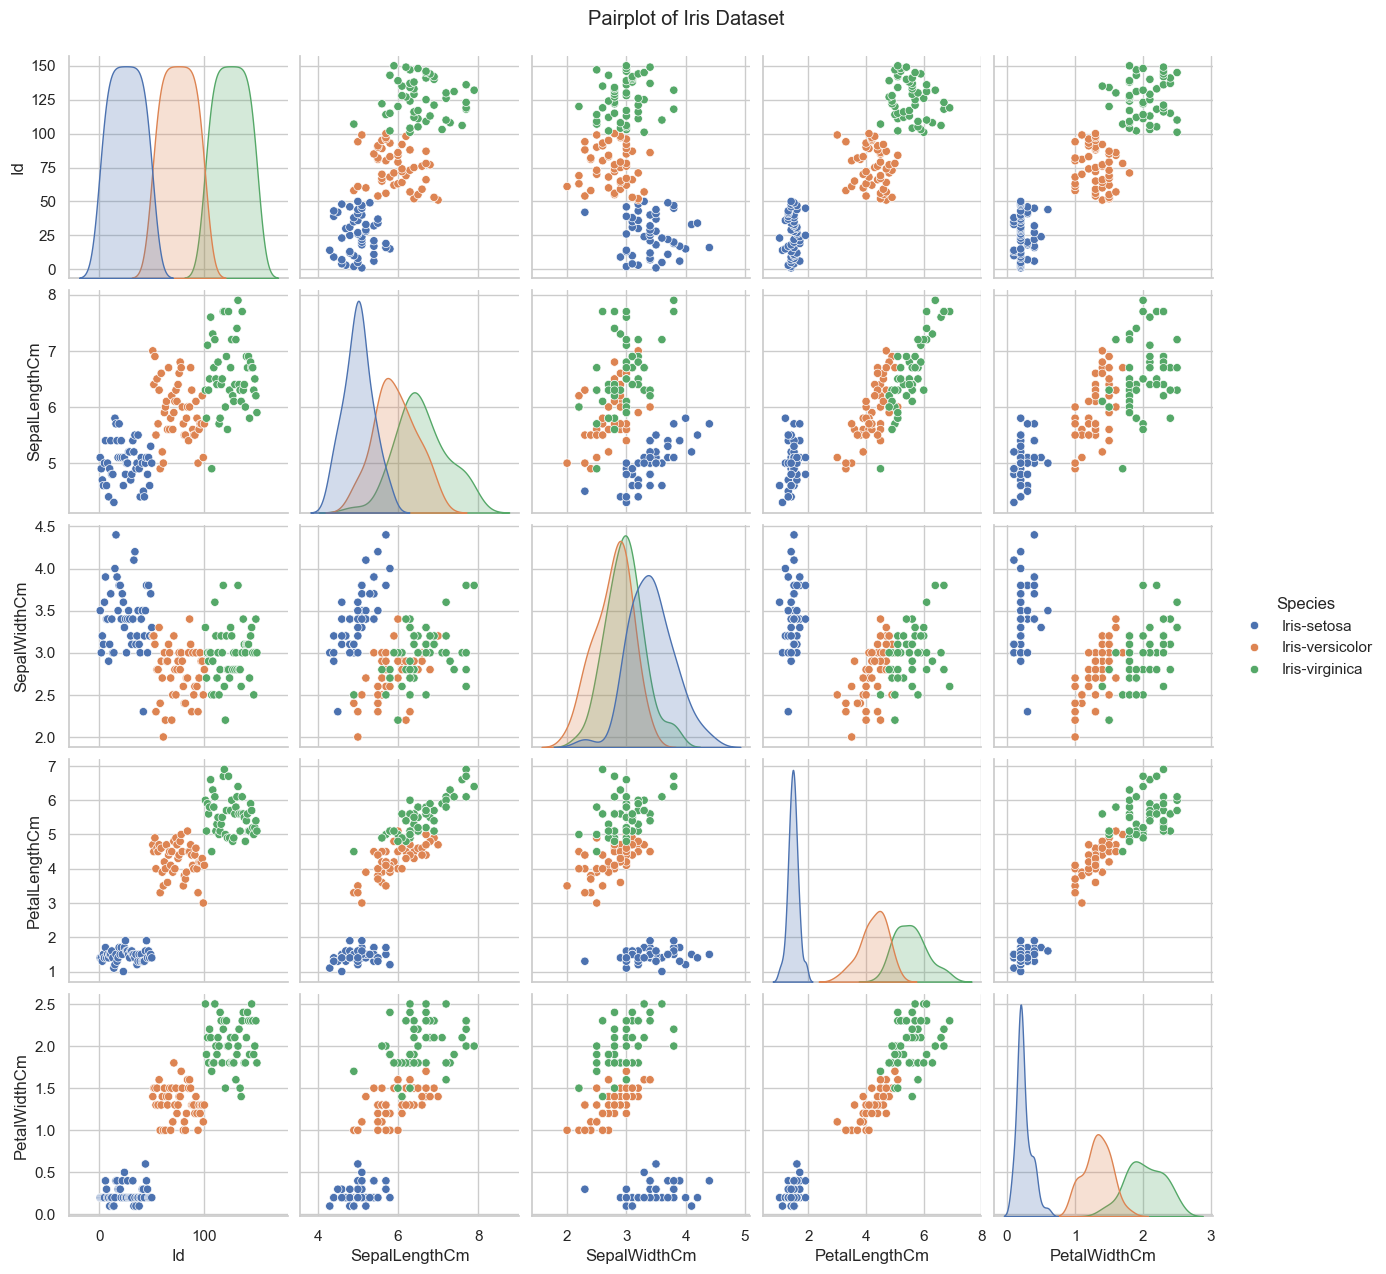

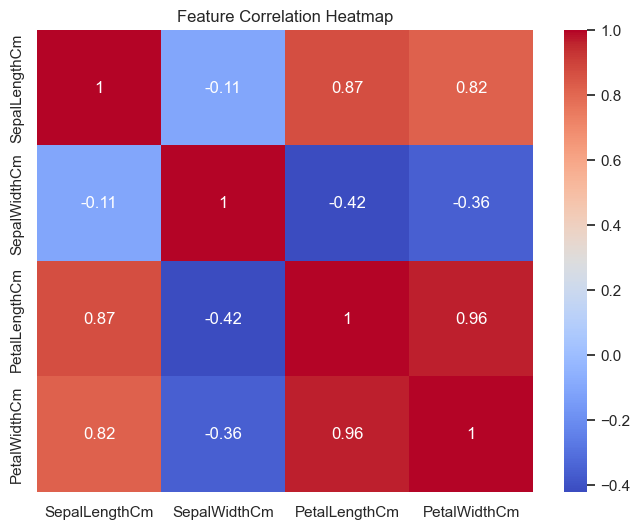

In [15]:
# Pairplot for visualization of feature relationships
sns.pairplot(df, hue='Species', diag_kind='kde')
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

# Correlation heatmap for numeric columns
num_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [17]:
# Define features (X) and target (y)
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data preprocessing completed!")


Label mapping: {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
✅ Data preprocessing completed!


In [19]:
# Train and evaluate multiple models

models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    
    print(f"\n🔹 Model: {name}")
    print("Accuracy:", round(acc, 4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    
    results[name] = acc

print("\n✅ Model training & evaluation completed!")
print("Results summary:", results)



🔹 Model: RandomForest
Accuracy: 0.9
Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30


🔹 Model: SVM
Accuracy: 0.9667
Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30


🔹 Model: KNN
Ac

In [27]:
# Let’s say RandomForest performed best — we’ll tune it

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

clf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validation accuracy:", round(grid.best_score_, 4))


Best parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
Best cross-validation accuracy: 0.9583


✅ Tuned Model Evaluation
Test Accuracy: 0.9667
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



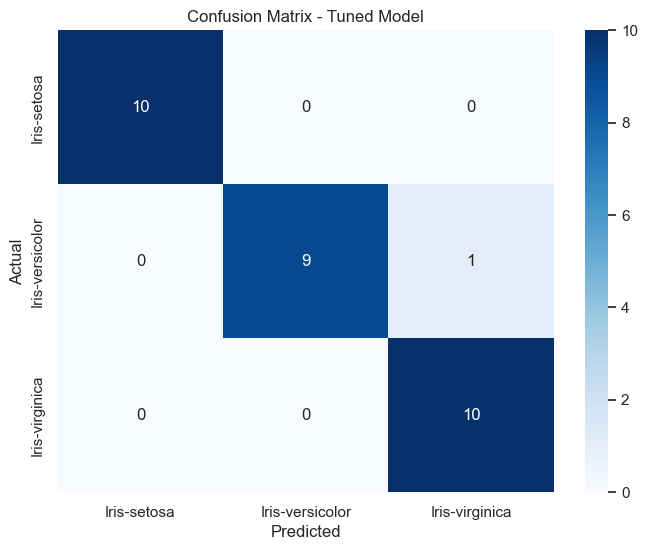

In [28]:
# Evaluate the tuned (best) model on test data
best_model = grid.best_estimator_
y_best_pred = best_model.predict(X_test_scaled)

print("✅ Tuned Model Evaluation")
print("Test Accuracy:", round(accuracy_score(y_test, y_best_pred), 4))
print("Classification Report:\n", classification_report(y_test, y_best_pred, target_names=le.classes_))

sns.heatmap(confusion_matrix(y_test, y_best_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Tuned Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [30]:
# Perform 5-fold cross validation for more reliable results
cv_scores = cross_val_score(best_model, scaler.transform(X), y_encoded, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", round(cv_scores.mean(), 4))


Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean CV Accuracy: 0.9667


In [34]:
# Save the trained model and scaler
joblib.dump(best_model, "iris_model.pkl")
joblib.dump(scaler, "iris_scaler.pkl")

print("✅ Model and scaler saved successfully!")


✅ Model and scaler saved successfully!


In [35]:
import pandas as pd

# Function to predict species from custom input
def predict_species(sample):
    """
    Predict Iris species from sample = [sepal_length, sepal_width, petal_length, petal_width]
    """
    # Convert list into DataFrame with the same column names as training data
    sample_df = pd.DataFrame([sample], columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
    
    # Scale using the same fitted scaler
    sample_scaled = scaler.transform(sample_df)
    
    # Predict and decode label
    pred = best_model.predict(sample_scaled)
    return le.inverse_transform(pred)[0]

# Example prediction
sample = [5.1, 3.5, 1.4, 0.2]
print(f"Prediction for {sample} => {predict_species(sample)}")


Prediction for [5.1, 3.5, 1.4, 0.2] => Iris-setosa
